In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
age_stat = {"min": df["age"].min(), 
            "max": df["age"].max(), 
            "mean": df["age"].mean(),
            "median": df["age"].median(),
            "mode": df["age"].mode().to_list(),
            "var": df["age"].var(ddof=0),
            "std": df["age"].std(ddof=0),
            "range": df["age"].max() - df["age"].min(),
            "interquartile_range": df["age"].quantile(0.75) - df["age"].quantile(0.25),
            "skew": df["age"].skew()
            }
age_stat

{'min': 40.0,
 'max': 95.0,
 'mean': 60.83389297658862,
 'median': 60.0,
 'mode': [60.0],
 'var': 141.0132839684793,
 'std': 11.874901429842662,
 'range': 55.0,
 'interquartile_range': 19.0,
 'skew': 0.42306190672863536}

In [4]:
from collections import OrderedDict
age_data1 = {age: df["age"].to_list().count(age) for age in set(df["age"])}
age_data = OrderedDict(sorted(age_data1.items(), key=lambda t: t[0]))
print(age_data)

OrderedDict([(40.0, 7), (41.0, 1), (42.0, 7), (43.0, 1), (44.0, 2), (45.0, 19), (46.0, 3), (47.0, 1), (48.0, 2), (49.0, 4), (50.0, 27), (51.0, 4), (52.0, 5), (53.0, 10), (54.0, 2), (55.0, 17), (56.0, 1), (57.0, 2), (58.0, 10), (59.0, 4), (60.0, 33), (60.667, 2), (61.0, 4), (62.0, 5), (63.0, 8), (64.0, 3), (65.0, 26), (66.0, 2), (67.0, 2), (68.0, 5), (69.0, 3), (70.0, 25), (72.0, 7), (73.0, 4), (75.0, 11), (77.0, 2), (78.0, 2), (79.0, 1), (80.0, 7), (81.0, 1), (82.0, 3), (85.0, 6), (86.0, 1), (87.0, 1), (90.0, 3), (94.0, 1), (95.0, 2)])


In [5]:
import matplotlib.pyplot as plt

In [6]:
age_df = pd.DataFrame.from_dict(data=age_data, orient="index", columns=["Age"])
age_df.head()

,Age
40.0,7
41.0,1
42.0,7
43.0,1
44.0,2


Text(0, 0.5, 'Количество осматриваемых людей')

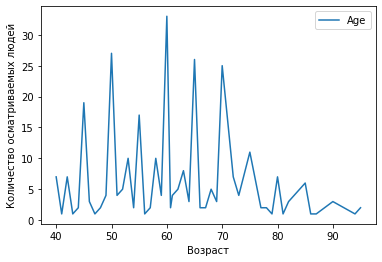

In [7]:
age_df.plot();
plt.xlabel("Возраст")
plt.ylabel("Количество осматриваемых людей")
#график распределения количества осматриваемых по каждому возрасту

In [8]:
#мужчины
male_df = df.loc[df["sex"] == 1]
m_num = male_df.shape[0]
m_percent = m_num / df.shape[0] * 100
print(m_num, m_percent, sep="\n")
male_df.head()

194
64.88294314381271


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1


In [9]:
#женщины
female_df = df.loc[df["sex"] == 0]
f_num = female_df.shape[0]
f_percent = f_num / df.shape[0] * 100
print(f_num, f_percent, sep="\n")
female_df.head()

105
35.11705685618729


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
14,49.0,1,80,0,30,1,427000.00,1.0,138,0,0,12,0
18,70.0,1,125,0,25,1,237000.00,1.0,140,0,0,15,1
19,48.0,1,582,1,55,0,87000.00,1.9,121,0,0,15,1


In [10]:
m_data = {age: male_df["age"].to_list().count(age) for age in set(male_df["age"])}
to_add_f_data = {age: 0 for age in set(df["age"]) if age not in set(male_df["age"])}
m_data.update(to_add_f_data)
age_m_df = pd.DataFrame.from_dict(data=m_data, 
                                  orient="index", 
                                  columns=["Males age"])

In [11]:
f_data = {age: female_df["age"].to_list().count(age) for age in set(female_df["age"])}
to_add_m_data = {age: 0 for age in set(df["age"]) if age not in set(female_df["age"])}
f_data.update(to_add_m_data)
age_f_df = pd.DataFrame.from_dict(data=f_data, 
                                  orient="index", 
                                  columns=["Females age"])     

In [12]:
age_all = age_df.merge(age_m_df, left_index=True, right_index=True)
age_all = age_all.merge(age_f_df, left_index=True, right_index=True)
age_all.head()

,Age,Males age,Females age
40.0,7,5,2
41.0,1,1,0
42.0,7,5,2
43.0,1,0,1
44.0,2,2,0


Text(0, 0.5, 'Количество осматриваемых людей')

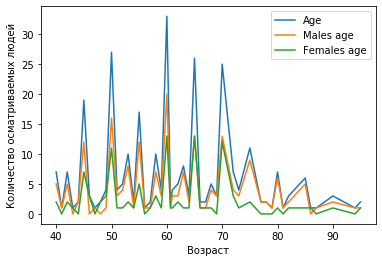

In [13]:
age_all.plot()
plt.xlabel("Возраст")
plt.ylabel("Количество осматриваемых людей")
#количество исследуемых женщин и мужчин в сравнении со всеми исследуемыми 

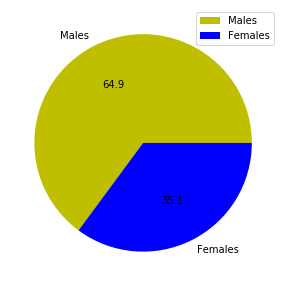

In [14]:
#круговая диаграмма расределения мужчин и женщин
age_pie = pd.DataFrame({"": [m_num, f_num]},
                       index=["Males", "Females"])
age_pie.plot.pie(y="",
                 colors=["y", "b"],
                 autopct="%.1f",
                 fontsize=10,
                 figsize=(5, 5));

In [15]:
#количество живых мужчин и женщин
death_df_y = df.loc[df["DEATH_EVENT"] == 1]
death_yes = death_df_y.shape[0]

In [16]:
death_df_n = df.loc[df["DEATH_EVENT"] == 0]
death_no = death_df_n.shape[0]

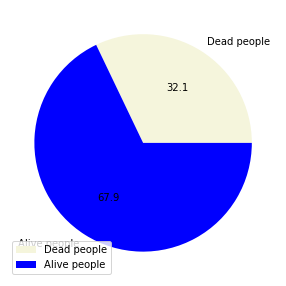

In [17]:
death_pie = pd.DataFrame({"": [death_yes, death_no]},
                       index=["Dead people", "Alive people"])
death_pie.plot.pie(y="",
                 colors=["beige", "blue"],
                 autopct="%.1f",
                 fontsize=10,
                 figsize=(5, 5));

In [18]:
anaemia_df_a = df.loc[df["anaemia"] == 1]
a_num_no = anaemia_df_a.shape[0]

In [19]:
anaemia_df_a = df.loc[df["anaemia"] == 0]
a_num_no = anaemia_df_a.shape[0]

In [20]:
anaemia_pie = pd.DataFrame({"": [a_num_yes, a_num_no]},
                       index=["People with anaemia", "People with no anemia"])
anaemia_pie.plot.pie(y="",
                 colors=["pink", "olive"],
                 autopct="%.1f",
                 fontsize=10,
                 figsize=(5, 5));

NameError: name 'a_num_yes' is not defined

In [144]:
q1 = male_df["age"].quantile(0.25)
q2 = male_df["age"].quantile(0.5)
q3 = male_df["age"].quantile(0.75)

In [145]:
index = ["[%d;%d)" %(round(age_stat["min"]), round(q1)), 
         "[%d;%d)" %(round(q1), round(q3)), 
         "[%d;%d]" %(round(q3), round(age_stat["max"]))]

In [146]:
#количество умерших и выживших мужчин в каждом ворастном диапазоне
alive = [male_df.query("age < @q1 & DEATH_EVENT == 0").shape[0], 
         male_df.query("@q1 <= age < @q3 & DEATH_EVENT == 0").shape[0],
         male_df.query("age >= @q3 & DEATH_EVENT == 0").shape[0]]

dead = [male_df.query("age < @q1 & DEATH_EVENT == 1").shape[0], 
         male_df.query("@q1 <= age < @q3 & DEATH_EVENT == 1").shape[0],
         male_df.query("age >= @q3 & DEATH_EVENT == 1").shape[0]]

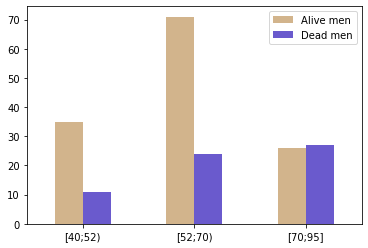

In [147]:
dead_or_alive = pd.DataFrame({"Alive men": alive, "Dead men": dead}, index=index)
dead_or_alive.plot.bar(color=["tan", "slateblue"],
                       rot=0);

In [148]:
#количество умерших и выживших женщин в каждом ворастном диапазоне
falive = [female_df.query("age < @q1 & DEATH_EVENT == 0").shape[0], 
         female_df.query("@q1 <= age < @q3 & DEATH_EVENT == 0").shape[0],
         female_df.query("age >= @q3 & DEATH_EVENT == 0").shape[0]]

fdead = [female_df.query("age < @q1 & DEATH_EVENT == 1").shape[0], 
         female_df.query("@q1 <= age < @q3 & DEATH_EVENT == 1").shape[0],
         female_df.query("age >= @q3 & DEATH_EVENT == 1").shape[0]]

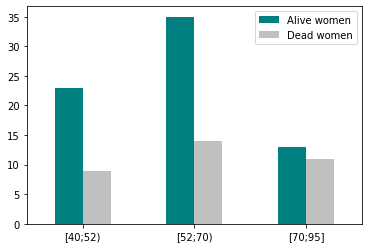

In [149]:
dead_or_alive = pd.DataFrame({"Alive women": falive, "Dead women": fdead}, index=index)
dead_or_alive.plot.bar(color=["teal", "silver"],
                       rot=0);

In [150]:
q_ = 15
q_1 = round(time_stat["max"]/3)
q_3 = round(2*time_stat["max"]/3)

In [151]:
time_stat = {"min": df["time"].min(), 
            "max": df["time"].max(), 
            "mean": df["time"].mean(),
            "median": df["time"].median()
            }

In [152]:
index = ["[%d;%d]" %(round(time_stat["min"]), 15),
         "[%d;%d)" %(round(time_stat["min"]), round(time_stat["max"]/3)), 
         "[%d;%d)" %(round(time_stat["max"]/3), round(2*time_stat["max"]/3)), 
         "[%d;%d]" %(round(2*time_stat["max"]/3), round(time_stat["max"]))]

In [153]:
#наличие курения + анемии в зависимости от количества дней наблюдения в больницу для мужчин
smoking_anaemia_m = [male_df.query("time < @q_ & anaemia == 1 & smoking == 1").shape[0], 
         male_df.query("time < @q_1 & anaemia == 1 & smoking == 1").shape[0], 
         male_df.query("@q_1 <= time < @q_3 & anaemia == 1 & smoking == 1").shape[0],
         male_df.query("time >= @q_3 & anaemia == 1 & smoking == 1").shape[0]]

not_smoking_anaemia_m = [male_df.query("time < @q_ & anaemia == 0 & smoking == 0").shape[0],
         male_df.query("time < @q_1 & anaemia == 0 & smoking == 0").shape[0], 
         male_df.query("@q_1 <= time < @q_3 & anaemia == 0 & smoking == 0").shape[0],
         male_df.query("time >= @q_3 & anaemia == 0 & smoking == 0").shape[0]]

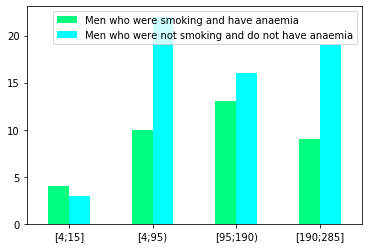

In [154]:
sm_an_m = pd.DataFrame({"Men who were smoking and have anaemia": smoking_anaemia_m, "Men who were not smoking and do not have anaemia": not_smoking_anaemia_m}, index=index)
sm_an_m.plot.bar(color=["springgreen", "cyan"],
                       rot=0);

In [155]:
#наличие курения + анемии в зависимости от количества дней наблюдения  в больницу для женщин
smoking_anaemia_f = [female_df.query("time < @q_ & anaemia == 1 & smoking == 1").shape[0],
         female_df.query("time < @q_1 & anaemia == 1 & smoking == 1").shape[0], 
         female_df.query("@q_1 <= time < @q_3 & anaemia == 1 & smoking == 1").shape[0],
         female_df.query("time >= @q_3 & anaemia == 1 & smoking == 1").shape[0]]

not_smoking_anaemia_f = [female_df.query("time < @q_ & anaemia == 0 & smoking == 0").shape[0],
         female_df.query("time < @q_1 & anaemia == 0 & smoking == 0").shape[0], 
         female_df.query("@q_1 <= time < @q_3 & anaemia == 0 & smoking == 0").shape[0],
         female_df.query("time >= @q_3 & anaemia == 0 & smoking == 0").shape[0]]

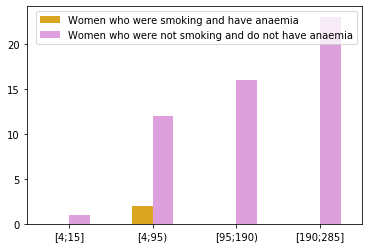

In [156]:
sm_an_f = pd.DataFrame({"Women who were smoking and have anaemia": smoking_anaemia_f, "Women who were not smoking and do not have anaemia": not_smoking_anaemia_f}, index=index)
sm_an_f.plot.bar(color=["goldenrod", "plum"],
                       rot=0);

In [157]:
#диаграмма количества дней наблюдения  в больницу и мертвые/живые женщины + курение
smoking_dead_f = [female_df.query("time < @q_ & DEATH_EVENT == 1 & smoking == 1").shape[0],
         female_df.query("time < @q_1 & DEATH_EVENT == 1 & smoking == 1").shape[0], 
         female_df.query("@q_1 <= time < @q_3 & DEATH_EVENT == 1 & smoking == 1").shape[0],
         female_df.query("time >= @q_3 & DEATH_EVENT == 1 & smoking == 1").shape[0]]

smoking_alive_f = [female_df.query("time < @q_ & DEATH_EVENT == 0 & smoking == 1").shape[0],
         female_df.query("time < @q_1 & DEATH_EVENT == 0 & smoking == 1").shape[0], 
         female_df.query("@q_1 <= time < @q_3 & DEATH_EVENT == 0 & smoking == 1").shape[0],
         female_df.query("time >= @q_3 & DEATH_EVENT == 0 & smoking == 1").shape[0]]

notsmoking_dead_f = [female_df.query("time < @q_ & DEATH_EVENT == 1 & smoking == 0").shape[0],
         female_df.query("time < @q_1 & DEATH_EVENT == 1 & smoking == 0").shape[0], 
         female_df.query("@q_1 <= time < @q_3 & DEATH_EVENT == 1 & smoking == 0").shape[0],
         female_df.query("time >= @q_3 & DEATH_EVENT == 1 & smoking == 0").shape[0]]

notsmoking_alive_f = [female_df.query("time < @q_ & DEATH_EVENT == 0 & smoking == 0").shape[0],
         female_df.query("time < @q_1 & DEATH_EVENT == 0 & smoking == 0").shape[0], 
         female_df.query("@q_1 <= time < @q_3 & DEATH_EVENT == 0 & smoking == 0").shape[0],
         female_df.query("time >= @q_3 & DEATH_EVENT == 0 & smoking == 0").shape[0]]

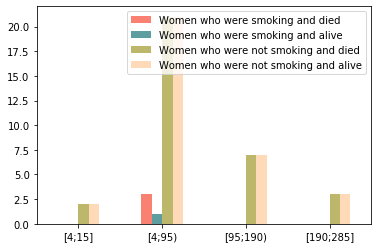

In [158]:
sm_death_f = pd.DataFrame({"Women who were smoking and died": smoking_dead_f, "Women who were smoking and alive": smoking_alive_f, "Women who were not smoking and died": notsmoking_dead_f, "Women who were not smoking and alive": notsmoking_dead_f,}, index=index)
sm_death_f.plot.bar(color=["salmon", "cadetblue", "darkkhaki", "peachpuff"],
                       rot=0);

In [159]:
#диаграмма количества дней наблюдения  попадания в больницу и мертвые/живые мужчины + курение
smoking_dead_m = [male_df.query("time < @q_ & DEATH_EVENT == 1 & smoking == 1").shape[0],
         male_df.query("time < @q_1 & DEATH_EVENT == 1 & smoking == 1").shape[0], 
         male_df.query("@q_1 <= time < @q_3 & DEATH_EVENT == 1 & smoking == 1").shape[0],
         male_df.query("time >= @q_3 & DEATH_EVENT == 1 & smoking == 1").shape[0]]

smoking_alive_m = [male_df.query("time < @q_ & DEATH_EVENT == 0 & smoking == 1").shape[0],
         male_df.query("time < @q_1 & DEATH_EVENT == 0 & smoking == 1").shape[0], 
         male_df.query("@q_1 <= time < @q_3 & DEATH_EVENT == 0 & smoking == 1").shape[0],
         male_df.query("time >= @q_3 & DEATH_EVENT == 0 & smoking == 1").shape[0]]

notsmoking_dead_m = [male_df.query("time < @q_ & DEATH_EVENT == 1 & smoking == 0").shape[0],
         male_df.query("time < @q_1 & DEATH_EVENT == 1 & smoking == 0").shape[0], 
         male_df.query("@q_1 <= time < @q_3 & DEATH_EVENT == 1 & smoking == 0").shape[0],
         male_df.query("time >= @q_3 & DEATH_EVENT == 1 & smoking == 0").shape[0]]

notsmoking_alive_m = [male_df.query("time < @q_ & DEATH_EVENT == 0 & smoking == 0").shape[0],
         male_df.query("time < @q_1 & DEATH_EVENT == 0 & smoking == 0").shape[0], 
         male_df.query("@q_1 <= time < @q_3 & DEATH_EVENT == 0 & smoking == 0").shape[0],
         male_df.query("time >= @q_3 & DEATH_EVENT == 0 & smoking == 0").shape[0]]

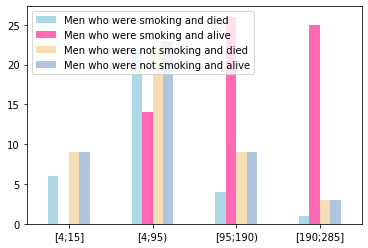

In [160]:
sm_death_m = pd.DataFrame({"Men who were smoking and died": smoking_dead_m, "Men who were smoking and alive": smoking_alive_m, "Men who were not smoking and died": notsmoking_dead_m, "Men who were not smoking and alive": notsmoking_dead_m,}, index=index)
sm_death_m.plot.bar(color=["lightblue", "hotpink", "wheat", "lightsteelblue"],
                       rot=0);